In [1]:
import os, sys
import time
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import skimage.io

parentPath = os.path.abspath("..")
if parentPath not in sys.path:
    sys.path.insert(0, parentPath)

import model as modellib
import visualize
from model import log

%matplotlib inline 

# Root directory of the project
ROOT_DIR = parentPath
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
WEIGHTS_DIR = os.path.join(MODEL_DIR, "mask_rcnn_seg_scenenn_0100.h5")

Using TensorFlow backend.


In [2]:
from instance_segmentation.object_config import Config

class InferenceConfig(Config):
    MODE = 'RGBD'
    MEAN_PIXEL = np.array([123.7, 116.8, 103.9, 1220.7])

inference_config = InferenceConfig()
# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", config=inference_config, model_dir=MODEL_DIR)
model.load_weights(WEIGHTS_DIR, by_name=True)

8.780783000000001


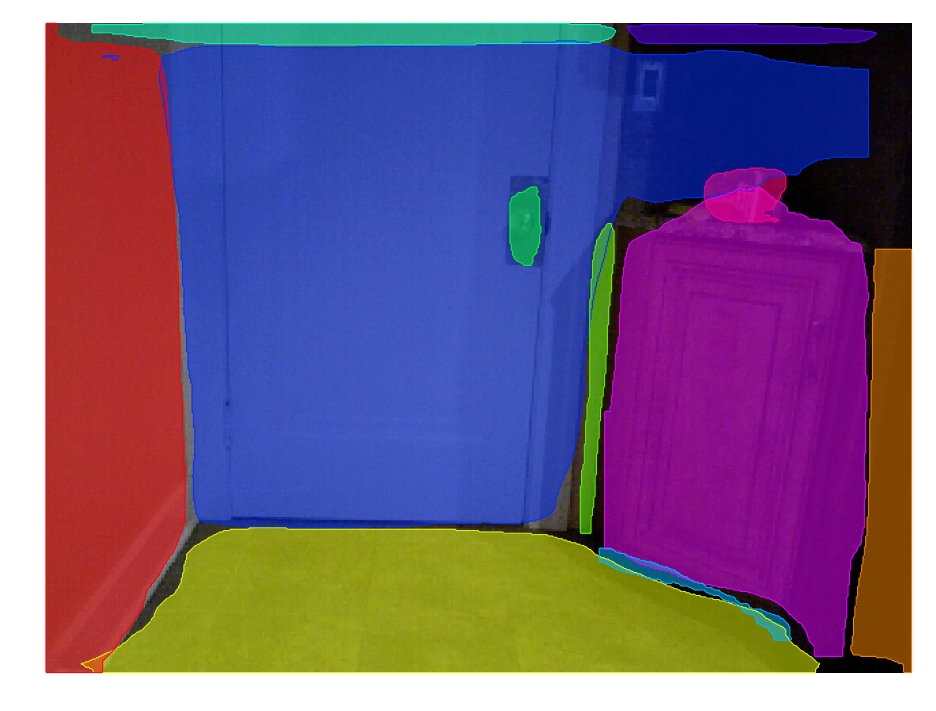

In [3]:
IMAGE_DIR = 'image00001.png'
DEPTH_DIR = 'depth00001.png'

image = depth = skimage.io.imread(IMAGE_DIR)
depth = skimage.io.imread(DEPTH_DIR)
rgbd = np.dstack((image, depth))

start = time.clock()
r = model.detect([rgbd])[0]
print(time.clock() - start)
visualize.display_masks(image, r['masks'])